# Análise dos pós-graduandos egressos da UFRN

( Informações gerais da equipe *blablabla* ) **EDITAR**

A [UFRN](http://www.ufrn.br/) (Universidade Federal do Rio Grande do Norte) possui um órgão responsável pelo gerenciamento dos programas de pós-graduação, que é a [Pró-reitoria de Pós-graduação](http://www.ppg.ufrn.br/index.php) (PPG) cujo 
> "desempenha um papel fundamental na expansão e consolidação do Sistema de Pós-graduação no âmbito da Universidade, na pespectiva de contribuir com as demandas da Sociedade Norte-rio-grandense e brasileira, como um importante instrumento de qualificação acadêmica e técnica." [[1]](http://www.ppg.ufrn.br/pagina.php?a=apresentacao#)

O ensino de pós-graduação da UFRN abrange tanto os programas *Stricto sensu* (Mestrado e Doutorado) quanto *Lato sensu* (Especialização e Residências em Saúde e outras áreas do conhecimento).

(ainda to melhorando o texto de intro)

**Perguntas que queremos responder (por ordem de prioridade)**

1. Quantos alunos de pós-graduação vieram de uma graduação anterior na UFRN?
2. Agrupando os programas de pós-graduação em áreas do saber (decidir como fazer isso, caso não haja essa informação no database), quais cursos mais contribuem para o reingresso de seus alunos na pós?
3. É possível traçar um perfil de um graduando que reingressará numa pós? Se sim, qual é o perfil? (essa pergunta talvez não seja tão interessante, buscar respondê-la caso haja tempo)

# Importando as bibliotecas

In [161]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analisando o grupo http://dados.ufrn.br/group/ensino

In [162]:
# dados abertos ufrn
# http://dados.ufrn.br/

# urls dos dados
alunos_2016_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016'
alunos_2015_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015'
alunos_2014_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014'
alunos_2013_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013'
alunos_2012_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/fc283aa9-61a7-4cf0-91fb-c403c0817b48/download/discentes-2012'
alunos_2011_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/2bb3dec9-7f23-434c-a179-21515f91abc8/download/discentes-2011'
alunos_2010_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/5fc61f78-19b4-4020-9f3c-c298cb8a63aa/download/discentes-2010'
alunos_2009_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/861b96a8-5304-4e6a-a8c4-068533ec7cb9/download/discentes-2009'

alunos_url = {alunos_2016_url, alunos_2015_url, alunos_2014_url, 
              alunos_2013_url, alunos_2012_url, alunos_2011_url, 
              alunos_2010_url, alunos_2009_url}

bolsas_url = 'http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/d21c94fe-22ba-4cf3-89db-54d8e739c567/download/bolsistas-de-iniciacao-cientifica.csv'

# alunos (2009 - 2016)
alunos = []
   
for i in alunos_url:
    alunos.append(pd.read_csv(i, sep=';'))

# bolsas de iniciação científica
bolsas = pd.read_csv(bolsas_url, sep=';')
#criar um dataframe com todas as listas
alunos_all = pd.concat(alunos)

# Filtrando dados

In [165]:
#filtra os alunos de doutorado
dout_all = alunos_all.loc[ alunos_all['nivel_ensino'] == 'DOUTORADO']

In [164]:
#filtra os alunos de graduação
grad = alunos_all.loc[ alunos_all['nivel_ensino'] == 'GRADUAÇÃO']

In [166]:
#verifica a interseção entre nomes de alunos nas duas tabelas acima
#dout_ufrn = set.intersection(set(dout_all['nome_discente']), set(grad['nome_discente'])) outro jeito de fazer
dout_ufrn = pd.merge(dout_all,grad, how='inner', on=['nome_discente']).drop_duplicates(["nome_discente"], keep='last')

In [168]:
#armazena a quantidade de alunos no doutorado e quais deles vieram de alguma graduação
values = [dout_all.shape[0],dout_ufrn.shape[0]]

## Alunos que fazem/fizeram doutorado vindos da UFRN

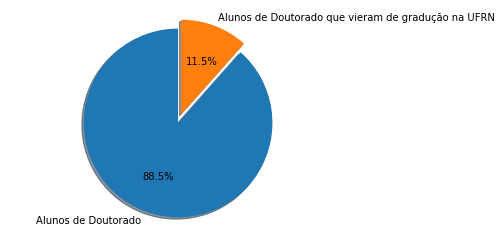

In [169]:
#cria um gráfico para mostrar a proporção de alunos que fizeram a graduação e que fizeram/fazem doutorado
fig1, ax1 = plt.subplots()
labels = 'Alunos de Doutorado', 'Alunos de Doutorado que vieram de gradução na UFRN'
explode = (0, 0.1)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Cursos que mais tem alunos indo para uma pós-graduação

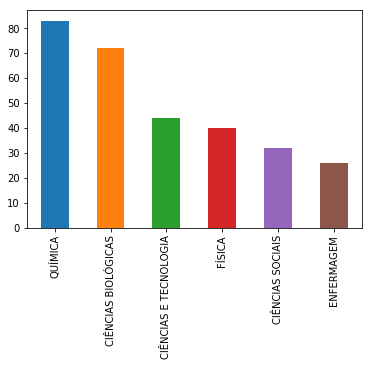

In [170]:
#pega a interseção entre os graduandos e os doutorandos porém agora em uma tabela pandas,
#pois assim podemos pegar os cursos.
#mostra os cursos que mais tem alunos na pós graduação
dout_cursos = pd.merge(dout_all,grad, how='inner', on=['nome_discente']).drop_duplicates(["nome_discente"], keep='last')
dout_cursos['nome_curso_y'].value_counts()[0:6].plot(kind='bar')

## Perfil do aluno que faz doutorado

In [171]:
#faz uma interseção pegando os alunos que fazem doutorado, vindos da UFRN, com aqueles que tem bolsas de iniciação cientifica
bolsas.rename(columns={'discente': 'nome_discente'}, inplace=True)
perfil = pd.merge(dout_cursos,bolsas, how='inner', on=['nome_discente']).drop_duplicates(["nome_discente"], keep='last')
dout_bolsa = perfil.shape[0]
perfil_dout = [len(dout_ufrn),dout_bolsa]

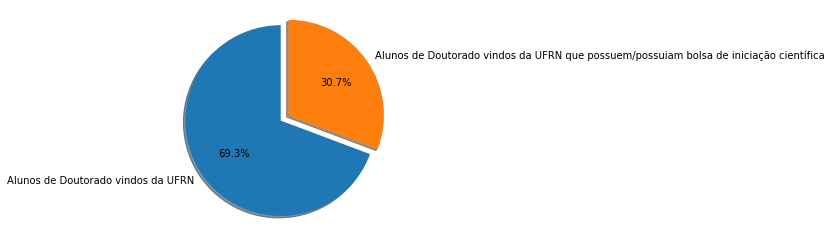

In [172]:
#cria um gráfico para mostrar a proporção de alunos que tem/tinham bolsas de iniciação ciêntifica
fig1, ax1 = plt.subplots()
labels = 'Alunos de Doutorado vindos da UFRN', 'Alunos de Doutorado vindos da UFRN que possuem/possuiam bolsa de iniciação científica'
explode = (0, 0.1)
ax1.pie(perfil_dout, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()